# DSM020 Coursework 2 
- Student Name: NG THIAM HENG
- Email: thng008@mymail.sim.edu.sg
--- 
##  Coursework 2 Objective:
### Find the best combination of TF-IDF and machine learning model that can predict a movie that has the highest score and compares with the result in CW1

#### Background: 
- In coursework 1, sentiment analysis (Polarity Model) was used to predict whether a movie is good or bad based on collected movie reviews, with a relatively high accuracy score.
- This coursework 2 will look at other NLP techniques as well as several machine learning models to predict a good or bad movie based on reviews and determine the best machine learning model with the highest overall accuracy score.
- Then compare it with the Polarity Model model in CW1 using Method 1 and 2, and determine which model is more suitable.
    
    
- **Method 1: Prediction based on individual review for each movie**
    - For Polarity
        - Each review will have a Polarity score and if the score >=0, assign 1 (Good) else 0 (Bad)
    - For ML
        - The ML model will predict 1 (Good) or 0 (Bad) for each review


- **Method 2: Based on the Prediction Average review**
    - For Polarity
        - For each movie, average the Polarity scores from all the corresponding reviews and make a final prediction.
        - If the average score >=0, assign 1 (Good) else assign 0 (Bad)
    - For ML
        - For each movie, average the ML prediction from all corresponding reviews and make a final prediction.
        - If the average score >=0.5, assign 1 (Good) else assign 0 (Bad)
        
### Dataset
- Taken from coursework 1
    - **Movie_title**   : Contains the title of a movie
    - **Review**        : Movie Review
    - **Actual_rating** : Assigned actual rating from the Good and Bad movie
    - **Polarity**      : Polarity score for each review

## Process flows: 
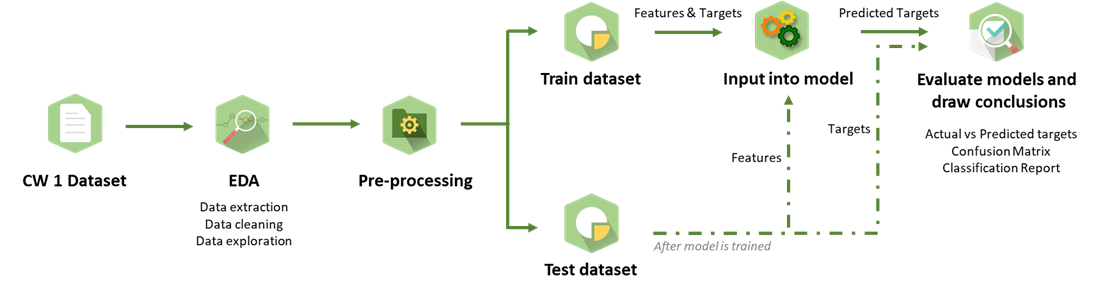

##### Step 1: Create requirements file, install and import libraries, and load the data from Coursework 1
- Install and Import the required libraries
- Load the data from CW1

##### Step 2: Perform data cleaning and manipulation
- Get the Polarity score from CW 1
- Map the Actual rating (Good/Bad) to 1 and 0

##### Step 3: Preprocess the reviews and split the data into Train and Test set
- Process the review column and split the data to train and test the machine learning models


##### Step 4: Train and test several classification machine learning models
- Convert the review column from text to number
- Using the GridSearch function from SKLearn to find the best model and hyperparameters(if any) with the training set

##### Step 5: Train the best model and the best parameters, and make a prediction
- Train the best machine learning model and best hyperparameter/s (if any) with the training set and use the trained model to predict

##### Step 6: Check the accuracy score based on individual reviews (Method 1)
- Check the accuracy using confusion matrix and classification report

##### Step 7: Check the accuracy score based on average reviews (Method 2)
- Check the accuracy using confusion matrix and classification report

##### Step 8 : Summary and Conclusion
- Compare the results between Method 1 and Method 2
- Determine which model is more suitable for this prediction


# Step 1: Create requirements file,  install and import libraries, and load the data from Coursework 1
### Step 1.1:  Create requirements file, install and import libraries

In [1]:
pip freeze >requirements.txt #create requirements file

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries

!pip install nltk

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 1.2 :  Load the data that were scraped from the website in CW1 
- File name : df.csv
- Is included in the zip file

In [3]:
df = pd.read_csv('df.csv')
df.drop(columns=['Subjectivity'], inplace=True) #remove non related column 
df.head()

,Movie_Title,Review,Actual_rating,Polarity
0,It Happened One Night,"It Happened One Night is a sparkling, amusing,...",Good,0.473333
1,It Happened One Night,"It makes no difference where you see it, just ...",Good,0.212500
2,It Happened One Night,The co-stars are a refreshing team with their ...,Good,0.600000
3,It Happened One Night,It is my broad opinion as a motion picture fan...,Good,0.265625
4,It Happened One Night,There is a growing conviction in this corner t...,Good,0.300000


# Step 2: Perform data cleaning and manipulation
### Step 2.1:  Get the average Polarity score for each movie

In [4]:
df_mean = df.groupby(['Movie_Title']).mean().reset_index()
df_mean = df_mean.rename(columns={'Polarity': 'Polarity_Avg'})
df_mean.head()

,Movie_Title,Polarity_Avg
0,A Little Bit Of Heaven,-0.024017
1,A Night at the Opera,0.243392
2,A Quiet Place,0.222780
3,A Star Is Born,0.248936
4,All About Eve,0.250518


### Step 2.2: Get the average Polarity score for each movie to the main table

In [5]:
df_final = df.merge(df_mean.drop_duplicates(subset=['Movie_Title']), how='left') #use left join to merge the average score
df_final

,Movie_Title,Review,Actual_rating,Polarity,Polarity_Avg
0,It Happened One Night,"It Happened One Night is a sparkling, amusing,...",Good,0.473333,0.400045
1,It Happened One Night,"It makes no difference where you see it, just ...",Good,0.212500,0.400045
2,It Happened One Night,The co-stars are a refreshing team with their ...,Good,0.600000,0.400045
3,It Happened One Night,It is my broad opinion as a motion picture fan...,Good,0.265625,0.400045
4,It Happened One Night,There is a growing conviction in this corner t...,Good,0.300000,0.400045
...,...,...,...,...,...
1946,Texas Rangers,"Call it Dude, Where's My Horse?",Bad,0.000000,-0.077708
1947,Texas Rangers,[A] almost refreshing for its total lack of am...,Bad,0.250000,-0.077708
1948,Texas Rangers,"A hip, cool western featuring some of today's ...",Bad,0.150000,-0.077708
1949,Texas Rangers,As dull as its title.,Bad,-0.291667,-0.077708


### Step 2.3:  Add and Remove columns

#### Add columns
- **Target_Actual** : Convert the Good and Bad to 1 and 0 
    - Logic:  "Good" = 1 | "Bad" = 0
    
    
- **Target_Polarity_Individual** : Convert each Polarity score to 1 and 0  
    - Logic:  Polarity >=0 = 1 | Polarity < 0 = 0
    
    
- **Target_Polarity_Avg** : Convert the average Polarity score to 1 and 0  
    - Logic:  Polarity_Avg >=0 = 1 | Polarity_Avg < 0 = 0

#### Remove columns
- Remove "Polarity" and	"Polarity_Avg" columns

In [6]:
df_final['Target_Actual'] = df_final.Actual_rating.apply(lambda x: 1 if x=='Good' else 0) #map using lambda function
df_final['Target_Polarity_Individual'] = df_final.Polarity.apply(lambda x: 1 if x>=0 else 0) #map using lambda function
df_final['Target_Polarity_Avg'] = df_final.Polarity_Avg.apply(lambda x: 1 if x>=0 else 0) #map using lambda function

df_final = df_final[['Movie_Title', 'Review','Target_Actual', 'Target_Polarity_Individual', 'Target_Polarity_Avg']]
df_final.head()

,Movie_Title,Review,Target_Actual,Target_Polarity_Individual,Target_Polarity_Avg
0,It Happened One Night,"It Happened One Night is a sparkling, amusing,...",1,1,1
1,It Happened One Night,"It makes no difference where you see it, just ...",1,1,1
2,It Happened One Night,The co-stars are a refreshing team with their ...,1,1,1
3,It Happened One Night,It is my broad opinion as a motion picture fan...,1,1,1
4,It Happened One Night,There is a growing conviction in this corner t...,1,1,1


# Step 3: Preprocess the reviews and split the data into Train and Test set

### Step 3.1:  Create a function to perform pre-processing on the reviews 
- Remove words that contain a number (Non-meaningful)
- Remove punctuation (Non-meaningful)
- Lower case (Prevent duplicate words in the TF-IDF)
- Lemmatization (Get the root word)
- Remove stopwords (Non-meaningful words)

In [7]:
def preprocess(text):
    '''
    This function will remove punctuation and numbers, lower case and lemmatize the word
    
    Input: 
    text : Sentance
    
    Output: 
    full_sentance : Sentance with removed punctuation and numbers, lower case and lemmatized
    
    '''
    sw = stopwords.words('english') #get all the english stopwords
    wordnet = WordNetLemmatizer() 
    
    text = re.sub(r'[^\w\s]','',text.lower()).replace('_',' ') #remove punctuation and lower case 
    lists_of_words = [] #store all individual words

    for word ,tag in pos_tag(word_tokenize(text)):
        if (re.search(r"\d+(\.\d+)?", word) ==None) & (word not in sw): #exclude word contains number and stopwords 
            pos=tag[0].lower()

            if pos not in ['a', 'r', 'n', 'v']:
                pos='n'

            lemm_word = wordnet.lemmatize(word,pos).lower() #get the root word and lower case
            lists_of_words.append(lemm_word) #store in a list

    full_sentance = ' '.join(lists_of_words) #form a sentance from the list
    return full_sentance

### Step 3.2:  Preprocess all the reviews

In [8]:
Preprocessed_Review = df_final.loc[:,'Review'].apply(lambda x: preprocess(x))
df_final.insert(5, "Preprocessed_Review", Preprocessed_Review, True)
df_final.head()

,Movie_Title,Review,Target_Actual,Target_Polarity_Individual,Target_Polarity_Avg,Preprocessed_Review
0,It Happened One Night,"It Happened One Night is a sparkling, amusing,...",1,1,1,happen one night sparkle amusing clean thoroug...
1,It Happened One Night,"It makes no difference where you see it, just ...",1,1,1,make difference see long see id see youve get ...
2,It Happened One Night,The co-stars are a refreshing team with their ...,1,1,1,costars refreshing team good look bonhomie talent
3,It Happened One Night,It is my broad opinion as a motion picture fan...,1,1,1,broad opinion motion picture fan happen one ni...
4,It Happened One Night,There is a growing conviction in this corner t...,1,1,1,grow conviction corner mr frank capra far holl...


### Step 3.3: Get the features (X) and targets (y)
- X : Preprocessed Reviews
- y : Actual movie rating in binary format

In [9]:
X = df_final.Preprocessed_Review.values
y = df_final.Target_Actual.values

### Step 3.4:  Split the data into training and testing data

- Using Sklearn train_test_split function to split the data
    - 70% --> Train data, 30% --> Test data
    
    
- Split the data using the stratification method
    - To ensure that the data have a similar proportion of good and bad movies in train and test sets
    
    
- Random state ensures that the data is split in the same way each time.

In [10]:
X_train_w, X_test_w, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

### Step 3.4:  Check the good and bad movie proportion in train and test dataset
- To ensure that there is no overweight number of records either in the good or bad category as this could have a negative impact when training the ML model


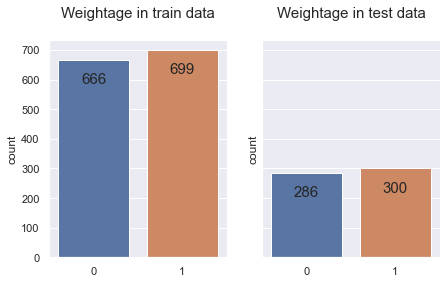

In [11]:
sns.set_theme()
fig, ax = plt.subplots(1,2,figsize=(7,4),sharey=True) #create subplot

ax[0].set_title('Weightage in train data\n', size=15)
ax[1].set_title('Weightage in test data\n', size=15)

sns.countplot(x=y_train, ax=ax[0])

for target in np.unique(y_train): 
    ax[0].text(x=target, y=(y_train == target).sum()-80
             , s=(y_train == target).sum()
             , horizontalalignment ='center', fontsize=15) 
    
sns.countplot(x=y_test, ax=ax[1])   
    
for target in np.unique(y_train): 
    ax[1].text(x=target, y=(y_test == target).sum()-80
             , s=(y_test == target).sum()
             , horizontalalignment ='center', fontsize=15) 

# Step 4: Train and test the classification machine learning algorithms

### Step 4.1:  In-order the features to train the models, it requires the features in numeric format. Hence, we will be using the TF-IDF method to convert the features from text to numeric format

- TFIDF, short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [12]:
corpus = X_train_w #assign the features to a variable

tf=TfidfVectorizer()
tfidf_matrix =  tf.fit_transform(corpus) #convert the features into TF-IDF format

#to array
tfidf_matrix = tfidf_matrix.toarray()
X_train = pd.DataFrame(tfidf_matrix, columns = tf.get_feature_names()) #convert into Dataframe
X_train

,aaron,ab,abandon,abides,ability,able,abrupt,absence,absent,absolute,...,zahn,zahns,zanes,zany,zealous,zero,zoe,zombie,zone,zoom
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,0.0,0.568306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1362,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1363,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4.2: To simulate the real-world scenario, the features (X) in the test data will feed into the pre-trained vector (previous step) and drop off any words that were not in the training set/vector.
- Only use transform function instead of fit_transform for test data 
- This is to prevent data leakage when training the models which will result in overfitting (High Variance and low Bias) when run in a production environment.
- The number of features (columns) should be the same as the training set

In [13]:
corpus = X_test_w #assign the features to a variable

tfidf_matrix =  tf.transform(corpus) #transform the variable

#to array
tfidf_matrix = tfidf_matrix.toarray()
X_test = pd.DataFrame(tfidf_matrix, columns = tf.get_feature_names()) #convert into Dataframe
X_test

,aaron,ab,abandon,abides,ability,able,abrupt,absence,absent,absolute,...,zahn,zahns,zanes,zany,zealous,zero,zoe,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4.3: Train all the classification machine learning algorithms to find the best hyperparameters for each model

- Using GridSearch function to find the best hyperparameters for each ML model
- Nested Cross-Validation is used for hyperparameters tuning and checking the overall stability of the model
- In general, the model without Nested Cross-Validation has a higher accuracy score than the model with Nested Cross-Validation.

#### Definition of some Classification Machine learning algorithms
- **Decision Tree**: It began with a root node and continued to split the data into Interior nodes until the group was free of impurities, at which point it formed a leaf note.


- **Random Forest**: It is an ensemble method using Bagging to train a model and the base predictor is using Decision Tree. It uses multiples trees to predict the target variables and based on the highest vote to output the final prediction. 


- **Logistic Regression**: It uses the probability by calculating the odds and based on a certain threshold to make a prediction.


- **Naive Bayes**: Mostly based on the Bays' Theorem to make a prediction and assume that the feature is independent of each other (Change in the value of 1 feature will not have a direct impact on other features.
    - Gaussian: Works better with continuous data. But it can be used for discrete data too
    - Multinomial : Works better for discrete data


- **Support Vector Machine**: Create a hyperplane that splits the features the best, with the furthest distances between the hyperplane and the data points for each target. Can be use for Classification (SVC) and Regression (SVR) problem.

- **KNeighbors**: It calculates the distance between the test and train dataset and then get the K numbers of corresponding targets in the training dataset based on the nearest distance between the test and train dataset. Finally, predict by finding the targets with the highest vote. 

#### Step 4.3.1: Create a dictionary with different classification models and the respective hyperparameters

In [14]:
model_parameters = {
    'SVC': {'model':svm.SVC(gamma='auto'),'params': {'C':[1,20],'kernel':['rbf','linear']}},
    
    'Random_Forest': {'model':RandomForestClassifier(),'params': {'n_estimators':[5,10], 'criterion':['gini', 'entropy']}},
    
    'Log_Regression' : {'model':LogisticRegression(solver='liblinear',multi_class='auto'),'params': {'C':[1,10]}},
    
    'NB_Gaussian': {'model': GaussianNB(),'params': {}},
    
    'NB_Multinomial': {'model':MultinomialNB(),'params': {}},
    
    'Decision_Tree': {'model': DecisionTreeClassifier(),'params':{'criterion':['gini','entropy']}},
    
    'KNN': {'model': KNeighborsClassifier(),'params':{'n_neighbors':[25,27]}},
                }

#### Step 4.3.2: Train the models with GridSearch function to find the best hyperparameters based on training data

Please allow **5 to 10 mins** to fully train all the models with the respective hyperparameters

In [15]:
scores = []

for ML_name, model_dict in model_parameters.items():
    clf =  GridSearchCV(model_dict['model'], model_dict['params'], cv=5, return_train_score=False) #5 folds
    clf.fit(X_train, y_train)
    scores.append({'model':ML_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})
    
ML_result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
ML_result = ML_result.sort_values(by=['best_score'], ascending=False)
ML_result.reset_index(level=0, drop=True, inplace=True)

#### Step 4.3.3: Best ML model and hyperparameters

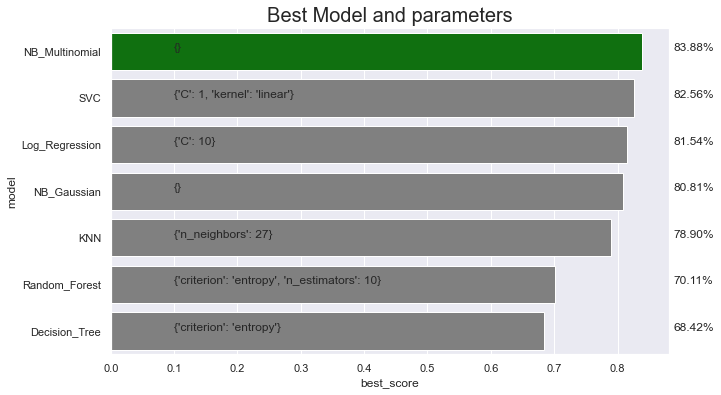

In [16]:
scores = ML_result.best_score.values

fig = plt.figure(figsize=(10, 6))

plt.title('Best Model and parameters',fontsize=20)

highlight = ['grey' if (x < max(scores)) else 'green' for x in scores ]

sns.barplot(y='model', x='best_score', data=ML_result, palette=highlight)
roww = 0

startx = max(scores)+0.05
 
for score in scores:
    plt.text(x=startx,y=roww,s='{0:.2%}'.format(score))
    params = ML_result.best_params[roww]
    plt.text(x=0.1,y=roww,s=params)
    roww+=1

# Step 5: Train the best model and the best parameters, and make a prediction

### Step 5.1:  Load and train the best model and get the prediction with test data

Based on the chart above, the Naive Bayes Multinomial have the highest score. Hence, the model will be used for the prediction


In [17]:
nb = MultinomialNB()
y_pred = nb.fit(X_train, y_train).predict(X_test) #store the prediction

### Step 5.2: Combine all the actual and predicted (Polarity and ML) rating

#### Step 5.2.1: Convert the test data into data frame

In [18]:
X_test_w_df = pd.DataFrame(X_test_w, columns=['Preprocessed_Review'])
X_test_w_df.head()

,Preprocessed_Review
0,hip cool western feature today hottest young star
1,insult bad vampire movie say mouthful
2,christiansens witless badly act thriller throw...
3,theres pay scar original plot element ton melo...
4,cooper prove talented behind camera front also...


#### Step 5.2.2: Left join to the test data frame with the corresponding data 
- left join based on 'Preprocessed_Review' column

In [19]:
Test_set= X_test_w_df.merge(df_final.drop_duplicates(subset=['Preprocessed_Review']), how='left')
Test_set = Test_set[['Movie_Title', 'Target_Actual', 'Target_Polarity_Individual','Target_Polarity_Avg']]
Test_set.head()

,Movie_Title,Target_Actual,Target_Polarity_Individual,Target_Polarity_Avg
0,Texas Rangers,0,1,0
1,Vampires Suck,0,0,0
2,The Roommate,0,0,1
3,The Darkness,0,0,0
4,A Star Is Born,1,1,1


#### Step 5.2.3: Add the ML predicted result into the data frame
- left join based on 'Preprocessed_Review' column

In [20]:
Test_set['Target_ML_Individual'] = y_pred
Test_set.head()

,Movie_Title,Target_Actual,Target_Polarity_Individual,Target_Polarity_Avg,Target_ML_Individual
0,Texas Rangers,0,1,0,0
1,Vampires Suck,0,0,0,0
2,The Roommate,0,0,1,0
3,The Darkness,0,0,0,0
4,A Star Is Born,1,1,1,1


# Step 6: Method 1 - Check the accuracy score based on individual reviews 

- **Method 1 : Prediction based on individual review for each movie**
    - For Polarity
        - Each review will have a Polarity score and if the score >=0, assign 1 (Good) else 0 (Bad)
    - For ML
        - The ML model will predict 1 (Good) or 0 (Bad) for each review

### Step 6.1: Method 1 - Confusion Matrix


In [21]:
def combine_confusion_matrix(y, y_predict_ML, y_predict_SA):
    '''
    This function will create 2 confusion matrix charts
    
    Inputs: 
    y : Ground Truth 
    y_predict_ML : Prediction 1 
    y_predict_SA : Prediction 2
    
    Output:
    2 confusion matrix charts
    '''
    
    fig, ax = plt.subplots(1,2,figsize=(7,4),sharey=True) #create subsplots
    
    for x in range(2):
        if x == 0:
            y_pred = y_predict_ML
            header = 'Actual vs ML'
        else:
            y_pred = y_predict_SA
            header = 'Actual vs Polarity'
            
        cf_matrix = confusion_matrix(y, y_pred)
        
        grp_names = ['True Neg','False Pos','False Neg','True Pos']
        grp_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        
        
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(grp_names,grp_counts)]
        labels = np.asarray(labels).reshape(2,2)

        sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"fontsize":12}, ax=ax[x])
        ax[x].set_title(header)

Method 1 : Confusion Matrix


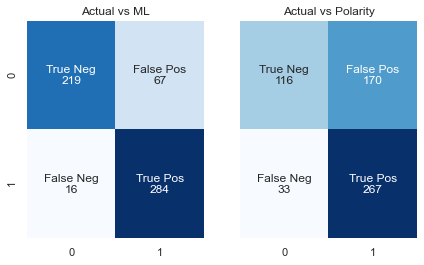

In [22]:
print("Method 1 : Confusion Matrix")

combine_confusion_matrix(Test_set.Target_Actual, Test_set.Target_ML_Individual, Test_set.Target_Polarity_Individual)

### Step 6.2:  Method 1 - Classification Report

#### Step 6.2.1:  Convert Classification Reports into Dataframe

In [23]:
#get the classification report
CR_ML = classification_report(Test_set.Target_Actual, Test_set.Target_ML_Individual,output_dict=True)
CR_SA = classification_report(Test_set.Target_Actual, Test_set.Target_Polarity_Individual,output_dict=True)

In [24]:
df_ML = pd.DataFrame(CR_ML).transpose()
df_ML['Type'] = 'ML'
df_ML.reset_index(level=0, inplace=True)

df_SA = pd.DataFrame(CR_SA).transpose()
df_SA['Type'] = 'Polarity'
df_SA.reset_index(level=0, inplace=True)

#Append the dataframe
Confusion_Matrix_ALL = df_ML.append(df_SA, ignore_index=True)
Confusion_Matrix_ALL

,index,precision,recall,f1-score,support,Type
0,0,0.931915,0.765734,0.840691,286.000000,ML
1,1,0.809117,0.946667,0.872504,300.000000,ML
2,accuracy,0.858362,0.858362,0.858362,0.858362,ML
3,macro avg,0.870516,0.856200,0.856597,586.000000,ML
4,weighted avg,0.869049,0.858362,0.856977,586.000000,ML
5,0,0.778523,0.405594,0.533333,286.000000,Polarity
6,1,0.610984,0.890000,0.724559,300.000000,Polarity
7,accuracy,0.653584,0.653584,0.653584,0.653584,Polarity
8,macro avg,0.694754,0.647797,0.628946,586.000000,Polarity
9,weighted avg,0.692752,0.653584,0.631230,586.000000,Polarity


#### Step 6.2.2 :  Convert to long format

In [25]:
Confusion_Matrix_ALL = pd.melt(Confusion_Matrix_ALL
                               , id_vars = ['Type','index']
                               , value_vars = ['precision', 'recall', 'f1-score'])
Confusion_Matrix_ALL

,Type,index,variable,value
0,ML,0,precision,0.931915
1,ML,1,precision,0.809117
2,ML,accuracy,precision,0.858362
3,ML,macro avg,precision,0.870516
4,ML,weighted avg,precision,0.869049
5,Polarity,0,precision,0.778523
6,Polarity,1,precision,0.610984
7,Polarity,accuracy,precision,0.653584
8,Polarity,macro avg,precision,0.694754
9,Polarity,weighted avg,precision,0.692752


#### Step 6.2.3:  Method 1 - Plot the Classification Report

<Figure size 1440x1440 with 0 Axes>

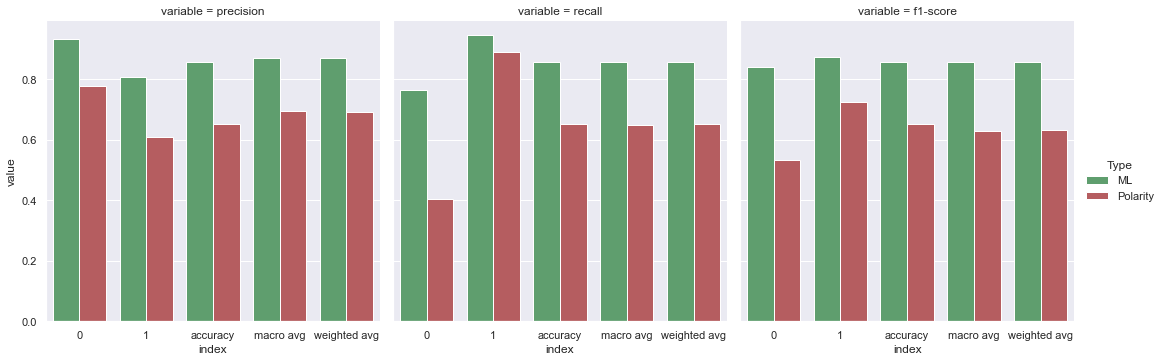

In [26]:
red = sns.color_palette()[3] #for Plolaitry rating
blue =sns.color_palette()[0] #for actual rating
green = sns.color_palette()[2] #for ML rating

fig= plt.figure(figsize=(20,20))

sns.catplot(x="index", y="value", col="variable", data=Confusion_Matrix_ALL
            , kind="bar",hue='Type', palette=([green,red]))

In [27]:
### Find the best Model
print('Method 1 : Based on ML score\n')
print(classification_report(Test_set.Target_Actual, Test_set.Target_ML_Individual))

print('\nMethod 1 : Based on Polarity score\n')
print(classification_report(Test_set.Target_Actual, Test_set.Target_Polarity_Individual))

Method 1 : Based on ML score

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       286
           1       0.81      0.95      0.87       300

    accuracy                           0.86       586
   macro avg       0.87      0.86      0.86       586
weighted avg       0.87      0.86      0.86       586


Method 1 : Based on Polarity score

              precision    recall  f1-score   support

           0       0.78      0.41      0.53       286
           1       0.61      0.89      0.72       300

    accuracy                           0.65       586
   macro avg       0.69      0.65      0.63       586
weighted avg       0.69      0.65      0.63       586



# Step 7: Method 2 - Check the accuracy score based on average reviews
- **Method 2: Based on the Prediction Average review**
    - For Polarity
        - For each movie, average the Polarity scores from all the corresponding reviews and make a final prediction.
        - If the average score >=0, assign 1 (Good) else assign 0 (Bad)
    - For ML
        - For each movie, average the ML prediction from all corresponding reviews and make a final prediction.
        - If the average score >=0.5, assign 1 (Good) else assign 0 (Bad)

### Step 7.1: Calculate Average rating

In [28]:
Test_set.head()

,Movie_Title,Target_Actual,Target_Polarity_Individual,Target_Polarity_Avg,Target_ML_Individual
0,Texas Rangers,0,1,0,0
1,Vampires Suck,0,0,0,0
2,The Roommate,0,0,1,0
3,The Darkness,0,0,0,0
4,A Star Is Born,1,1,1,1


In [29]:
Target_ML_Avg = Test_set[['Movie_Title', 'Target_ML_Individual']].groupby(['Movie_Title']).mean().reset_index()
Target_ML_Avg['Target_ML_Avg'] = Target_ML_Avg.Target_ML_Individual.apply(lambda x: 1 if x>=0.5 else 0 )
Target_ML_Avg.drop(columns=['Target_ML_Individual'], inplace=True)
Target_ML_Avg.head()

,Movie_Title,Target_ML_Avg
0,A Little Bit Of Heaven,0
1,A Night at the Opera,1
2,A Quiet Place,1
3,A Star Is Born,1
4,All About Eve,1


#### Step 7.1.2:  Combine the Target_ML_Avg to main table

In [30]:
Test_set2 = Target_ML_Avg.merge(Test_set[['Movie_Title','Target_Polarity_Avg','Target_Actual']].drop_duplicates(subset=['Movie_Title']), how='left')
Test_set2

,Movie_Title,Target_ML_Avg,Target_Polarity_Avg,Target_Actual
0,A Little Bit Of Heaven,0,0,0
1,A Night at the Opera,1,1,1
2,A Quiet Place,1,1,1
3,A Star Is Born,1,1,1
4,All About Eve,1,1,1
...,...,...,...,...
95,Twelve,0,0,0
96,Us,1,1,1
97,Vampires Suck,0,0,0
98,Wonder Woman,1,1,1


### Step 7.2:  Compare the predicted SA and ML based by average rating

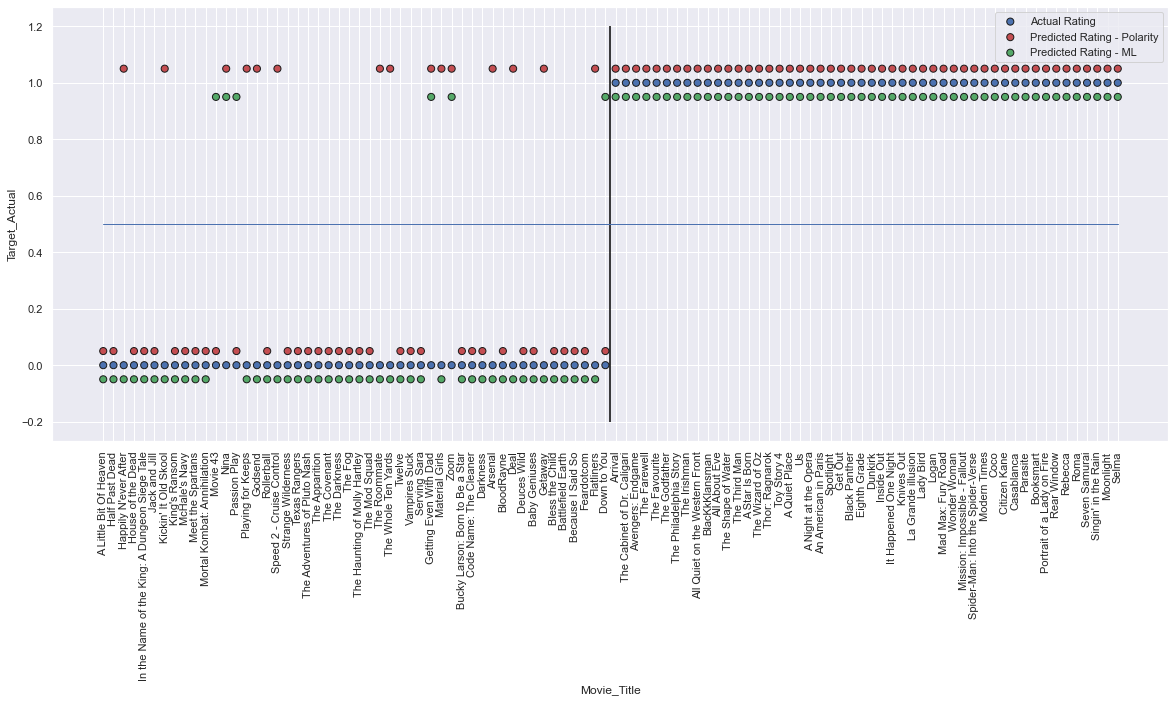

In [31]:
fig= plt.figure(figsize=(20,8))

splitline = len(Test_set2[Test_set2.Target_Actual==0])
Test_set3 = Test_set2.sort_values(by=['Target_Actual'])

plt.xticks(rotation=90)

sns.scatterplot(x=Test_set3.Movie_Title, y=Test_set3.Target_Actual
                ,s=200, marker=".", edgecolor='k', linewidth=1
                ,label = 'Actual Rating', c=[blue]*100)

sns.scatterplot(x=Test_set3.Movie_Title, y=Test_set3.Target_Polarity_Avg+0.05
                ,s=200, marker=".", edgecolor='k', linewidth=1
                ,label = 'Predicted Rating - Polarity', c=[red]*100)

sns.scatterplot(x=Test_set3.Movie_Title, y=Test_set3.Target_ML_Avg-0.05
                ,s=200, marker=".", edgecolor='k', linewidth=1
                ,label = 'Predicted Rating - ML', c=[green]*100)

sns.lineplot(x=Test_set3.Movie_Title, y=0.5
                ,linewidth=1
                ,label = ''
                )

plt.vlines(x=splitline-0.5, ymin=-0.2, ymax=1.2, colors='black')


### Step 7.3: Method 2 - Confusion Matrix

Method 2 : Confusion Matrix


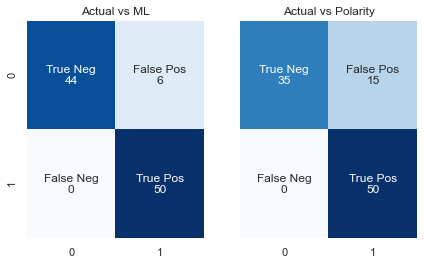

In [32]:
print("Method 2 : Confusion Matrix")
combine_confusion_matrix(Test_set2.Target_Actual, Test_set2.Target_ML_Avg, Test_set2.Target_Polarity_Avg)

### Step 7.4: Method 2 - Classification Report

#### Step 7.4.1 :  Convert Classification Reports into Dataframe

In [33]:
CR_ML_Avg = classification_report(Test_set2.Target_Actual, Test_set2.Target_ML_Avg,output_dict=True)
CR_SA_Avg = classification_report(Test_set2.Target_Actual, Test_set2.Target_Polarity_Avg,output_dict=True)

In [34]:
df_ML_Avg = pd.DataFrame(CR_ML_Avg).transpose()
df_ML_Avg['Type'] = 'ML'
df_ML_Avg.reset_index(level=0, inplace=True)

df_SA_Avg = pd.DataFrame(CR_SA_Avg).transpose()
df_SA_Avg['Type'] = 'Polarity'
df_SA_Avg.reset_index(level=0, inplace=True)

# Append the dataframe
Confusion_Matrix_Avg = df_ML_Avg.append(df_SA_Avg, ignore_index=True)
Confusion_Matrix_Avg

,index,precision,recall,f1-score,support,Type
0,0,1.000000,0.88,0.936170,50.00,ML
1,1,0.892857,1.00,0.943396,50.00,ML
2,accuracy,0.940000,0.94,0.940000,0.94,ML
3,macro avg,0.946429,0.94,0.939783,100.00,ML
4,weighted avg,0.946429,0.94,0.939783,100.00,ML
5,0,1.000000,0.70,0.823529,50.00,Polarity
6,1,0.769231,1.00,0.869565,50.00,Polarity
7,accuracy,0.850000,0.85,0.850000,0.85,Polarity
8,macro avg,0.884615,0.85,0.846547,100.00,Polarity
9,weighted avg,0.884615,0.85,0.846547,100.00,Polarity


#### Step 7.4.2 : Convert to long form data

In [35]:
Confusion_Matrix_Avg = pd.melt(Confusion_Matrix_Avg, id_vars =['Type','index'], value_vars =['precision', 'recall', 'f1-score'])
Confusion_Matrix_Avg

,Type,index,variable,value
0,ML,0,precision,1.000000
1,ML,1,precision,0.892857
2,ML,accuracy,precision,0.940000
3,ML,macro avg,precision,0.946429
4,ML,weighted avg,precision,0.946429
5,Polarity,0,precision,1.000000
6,Polarity,1,precision,0.769231
7,Polarity,accuracy,precision,0.850000
8,Polarity,macro avg,precision,0.884615
9,Polarity,weighted avg,precision,0.884615


#### Step 7.4.3 : Method 2 - Plot the Classification Report

<Figure size 1440x1440 with 0 Axes>

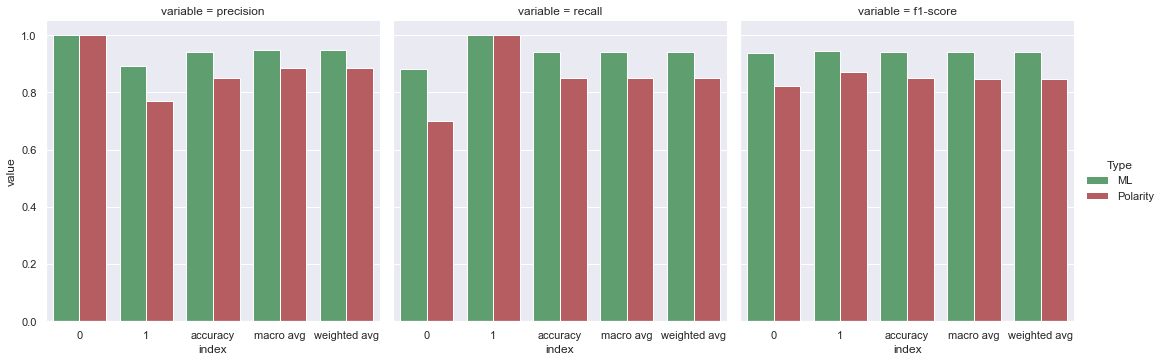

In [36]:
fig= plt.figure(figsize=(20,20))

sns.catplot(x="index", y="value", col="variable", data=Confusion_Matrix_Avg
            , kind="bar",hue='Type', palette=([green,red]))

In [37]:
### Find the best Model
print('Method 2 : Based on ML score\n')
print(classification_report(Test_set2.Target_Actual, Test_set2.Target_ML_Avg))

print('\nMethod 2: Based on Polarity score\n')
print(classification_report(Test_set2.Target_Actual, Test_set2.Target_Polarity_Avg))

Method 2 : Based on ML score

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       0.89      1.00      0.94        50

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100


Method 2: Based on Polarity score

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        50
           1       0.77      1.00      0.87        50

    accuracy                           0.85       100
   macro avg       0.88      0.85      0.85       100
weighted avg       0.88      0.85      0.85       100



# Step 8: Summary and Conclusion

### Step 8.1: Compare the result based on the Confusion Matrix

Based on **Method 1 (Individual Reviews)** and **Method 2 (Average Reviews)**, the ML Model's True Positive and True Negative are higher compared to Polarity Model.

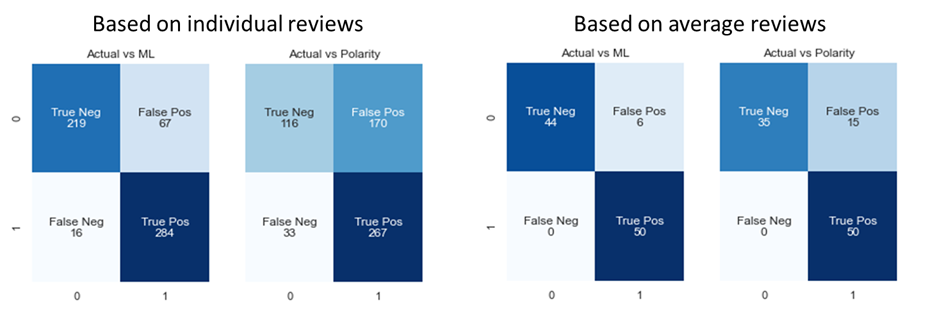

### Step 8.2: Compare the result based on Classification Report

Based on **Method 1 (Individual Reviews)** and **Method 2 (Average Reviews)**, the ML Model's accuracies (Green Bar) are higher compared to the Polarity Model's accuracies (Red Bar).

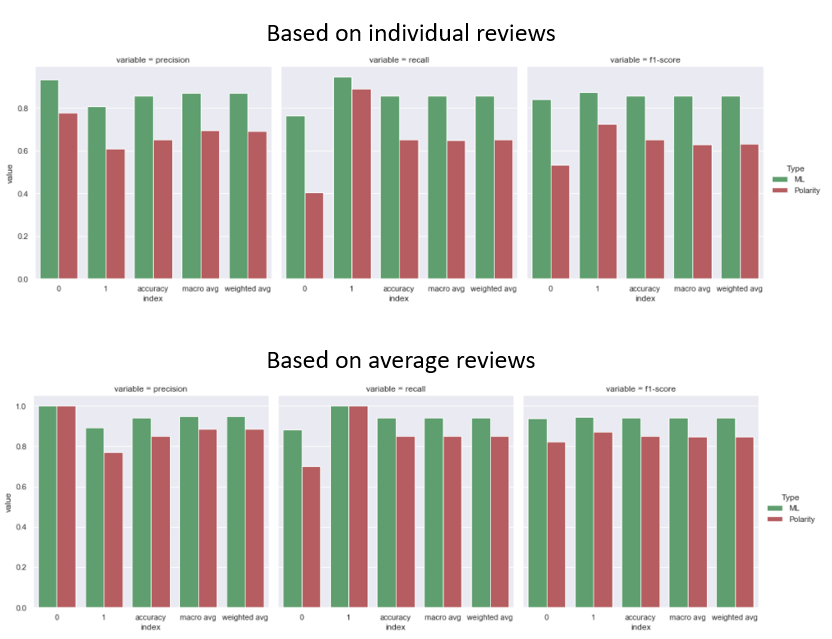

### Step 8.4 : Conclusion

### Method 1: Prediction based on individual review for each movie
- For Polarity
 - Each review will have a Polarity score and if the score >=0, assign 1 (Good) else 0 (Bad)
- For ML
 - The ML model will predict 1 (Good) or 0 (Bad) for each review

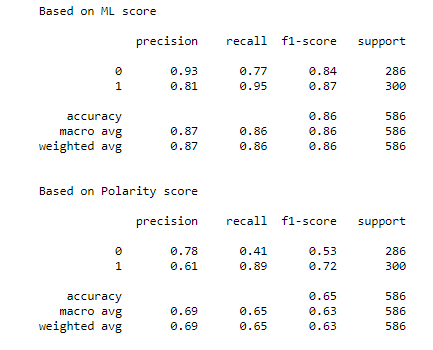


**Summary:**

- ML Model
 - Precision: Out of all the Movies that were predicted as **Bad** and **Good**, **93%** and **81%** were correctly predicted respectively.
 - Recall: Out of all the **Bad** and **Good** Movies, **77%** and **95%** were correctly predicted respectively.
 - F1-Score: The accuracy using the ML model is **86%**.


- Polarity model
 - Precision: Out of all the Movies that were predicted as **Bad** and **Good**, **78%** and **61%** were correctly predicted respectively.
 - Recall: Out of all the **Bad** and **Good** Movies, **41%** and **89%** were correctly predicted respectively.
 - F1-Score: The accuracy using the Polarity model is **65%**.


The Polarity model Recall score for Bad movie is **significantly lower** than the ML model by **36% (41% vs 77%)** . This means that out of all the Bad movies, the model is only able to predict 41% correctly. Also, the F1-Score is **lower** than the ML model by **21% (65% vs 86%)**. Hence, the ML model outperformed the Polarity model using Method 1.


### Method 2: Based on the Prediction Average review
- For Polarity
 - For each movie, average the Polarity scores from all the corresponding reviews and make a final prediction.
 - If the average score >=0, assign 1 (Good) else assign 0 (Bad)
- For ML
 - For each movie, average the ML prediction from all corresponding reviews and make a final prediction.
 - If the average score >=0.5, assign 1 (Good) else assign 0 (Bad)
        
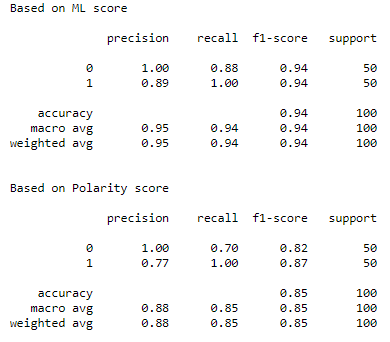


**Summary:**
- ML Model
 - Precision: Out of all the Movies that were predicted as **Bad** and **Good**, **100%** and **89%** were correctly predicted respectively.
 - Recall: Out of all the **Bad** and **Good** Movies, **88%** and **100%** were correctly predicted respectively.
 - F1-Score: The accuracy using the ML model is **94%**.


- Polarity model
 - Precision: Out of all the Movies that were predicted as **Bad** and **Good**, **100%** and **77%** were correctly predicted respectively.
 - Recall: Out of all the **Bad** and **Good** Movies, **70%** and **100%** were correctly predicted respectively.
 - F1-Score: The accuracy using the ML model is **85%**.


The Polarity model Recall score for Bad movie is **lower** than the ML model by **18% (70% vs 88%)** . This means that out of all the Bad movies, the model is only able to predict 70% correctly. Also, the F1-Score is **lower** than the ML model by **9% (85% vs 94%)** . Hence, the ML model outperformed the Polarity model using Method 2.


### Conclusion
- Based on the results above and both methods shows that the **ML model is better compared to the Polarity model**. Hence, the **ML model (TF-IDF and Naive Bayes Multinomial model)** is more suitable for predicting movie rating  